## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,auc,accuracy_score,precision_recall_curve,roc_curve
from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
import scipy.stats as stats

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Input , Dense , Dropout, BatchNormalization
from keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')

## **Data Collection**

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/arubhasy/dataset/main/diabetes.csv')

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


### **Data Preprocessing and EDA**

melihat type data setiap columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Mengecek missing values

In [ ]:
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

missing values handling dengan mengisi kolom NaN dengan 0

In [ ]:
df.fillna(0, inplace=True)

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,0.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,0.0,26.6,0.351,31,0
2,8,183.0,64.0,0.0,0.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,0.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,0.0,0.0,30.1,0.349,47,1


mengecek data duplikat

In [ ]:
df.duplicated().sum()

0

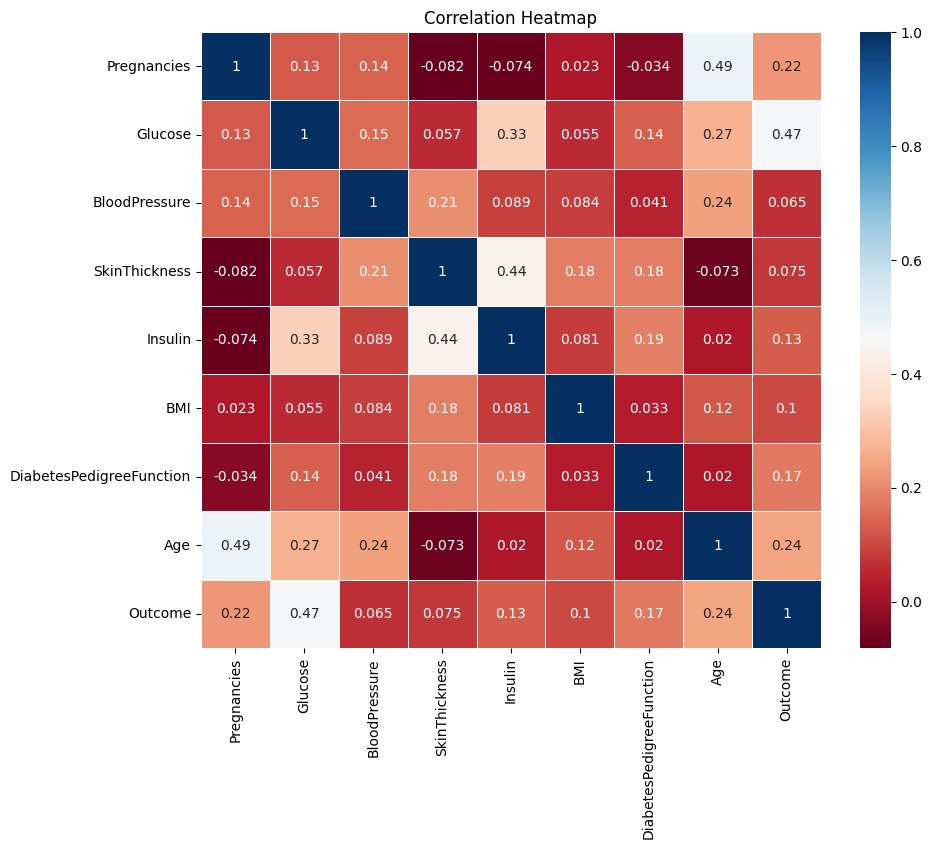

In [ ]:
num_cols = [col for col in df.columns if df[col].dtypes != "O"]
corr = df[num_cols].corr()

# Membuat heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='RdBu', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Analisis Deskriptif Statistik
descriptive_stats = df.describe()
print(descriptive_stats)

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    33.966016                  0.471876   33.631510    0.348958  
std     29.446477                  0.331329   13.872991    0.476951  
min      0.000000                  

# **Visualisasi deskriptif**

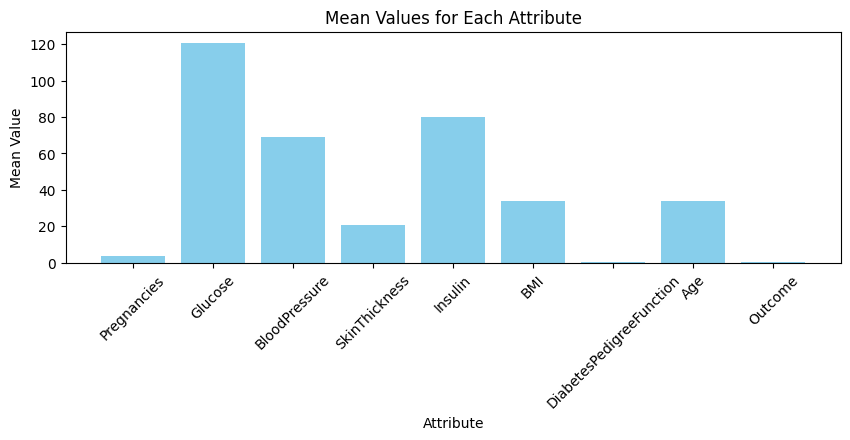

In [ ]:
import matplotlib.pyplot as plt

# Membuat visualisasi rata-rata
plt.figure(figsize=(10, 3))
plt.bar(descriptive_stats.columns, descriptive_stats.loc['mean'], color='skyblue')
plt.title("Mean Values for Each Attribute")
plt.xlabel("Attribute")
plt.ylabel("Mean Value")
plt.xticks(rotation=45)
plt.show()

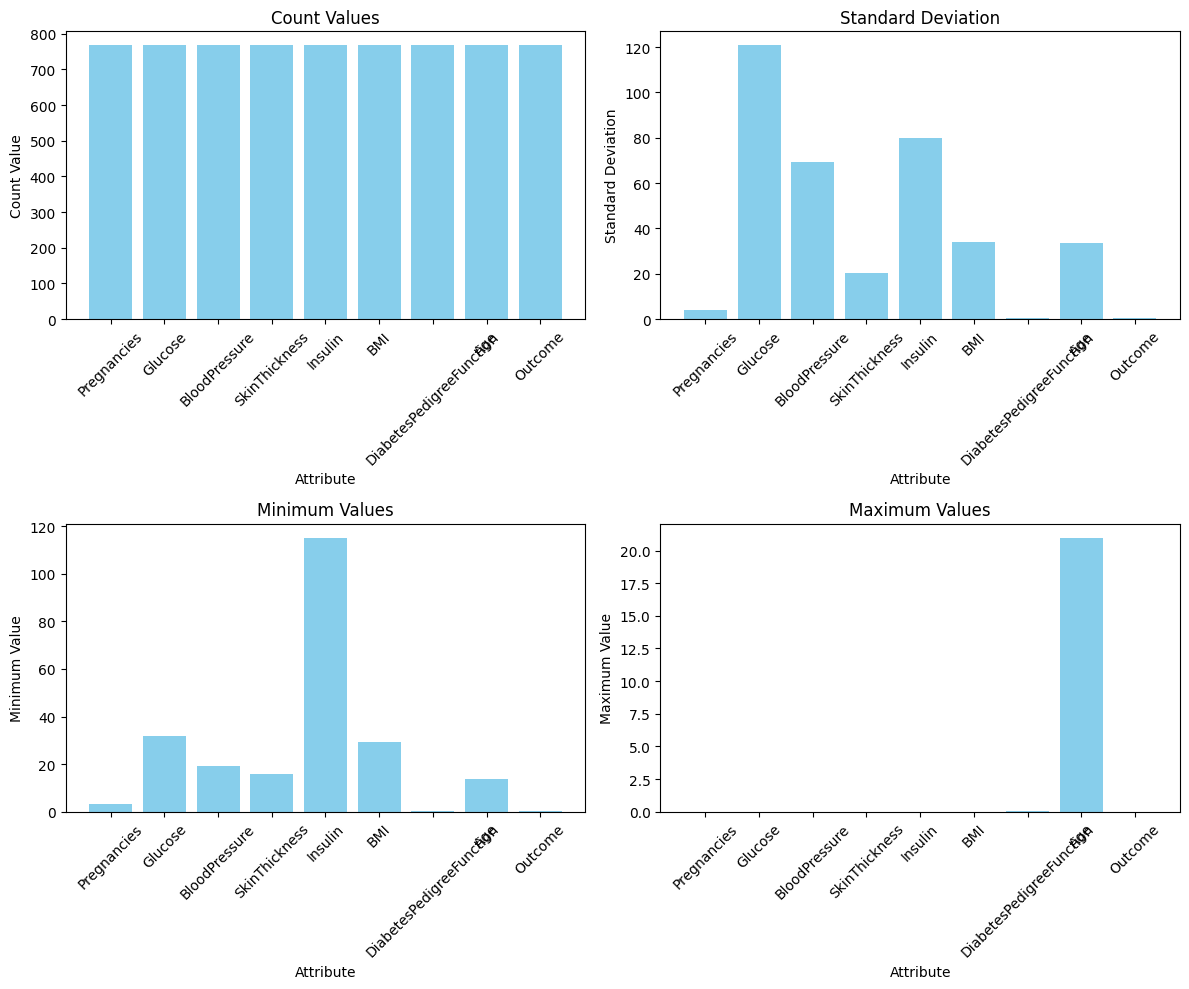

In [ ]:
def plot_descriptive_stats(descriptive_stats):
    attributes = descriptive_stats.columns

    # Membuat visualisasi deskriptif statistik dengan 2 kolom dan 2 baris pada satu canvas
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    colors = ['skyblue', 'skyblue', 'skyblue', 'skyblue']
    titles = ["Count Values", "Standard Deviation", "Minimum Values", "Maximum Values"]
    y_labels = ["Count Value", "Standard Deviation", "Minimum Value", "Maximum Value"]

    for i in range(4):
        ax = axes[i // 2, i % 2]
        ax.bar(attributes, descriptive_stats.iloc[i], color=colors[i])
        ax.set_title(titles[i])
        ax.set_xlabel("Attribute")
        ax.set_ylabel(y_labels[i])
        ax.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

# Menggunakan fungsi
plot_descriptive_stats(descriptive_stats)

Histogram frekuensi tiap attribute

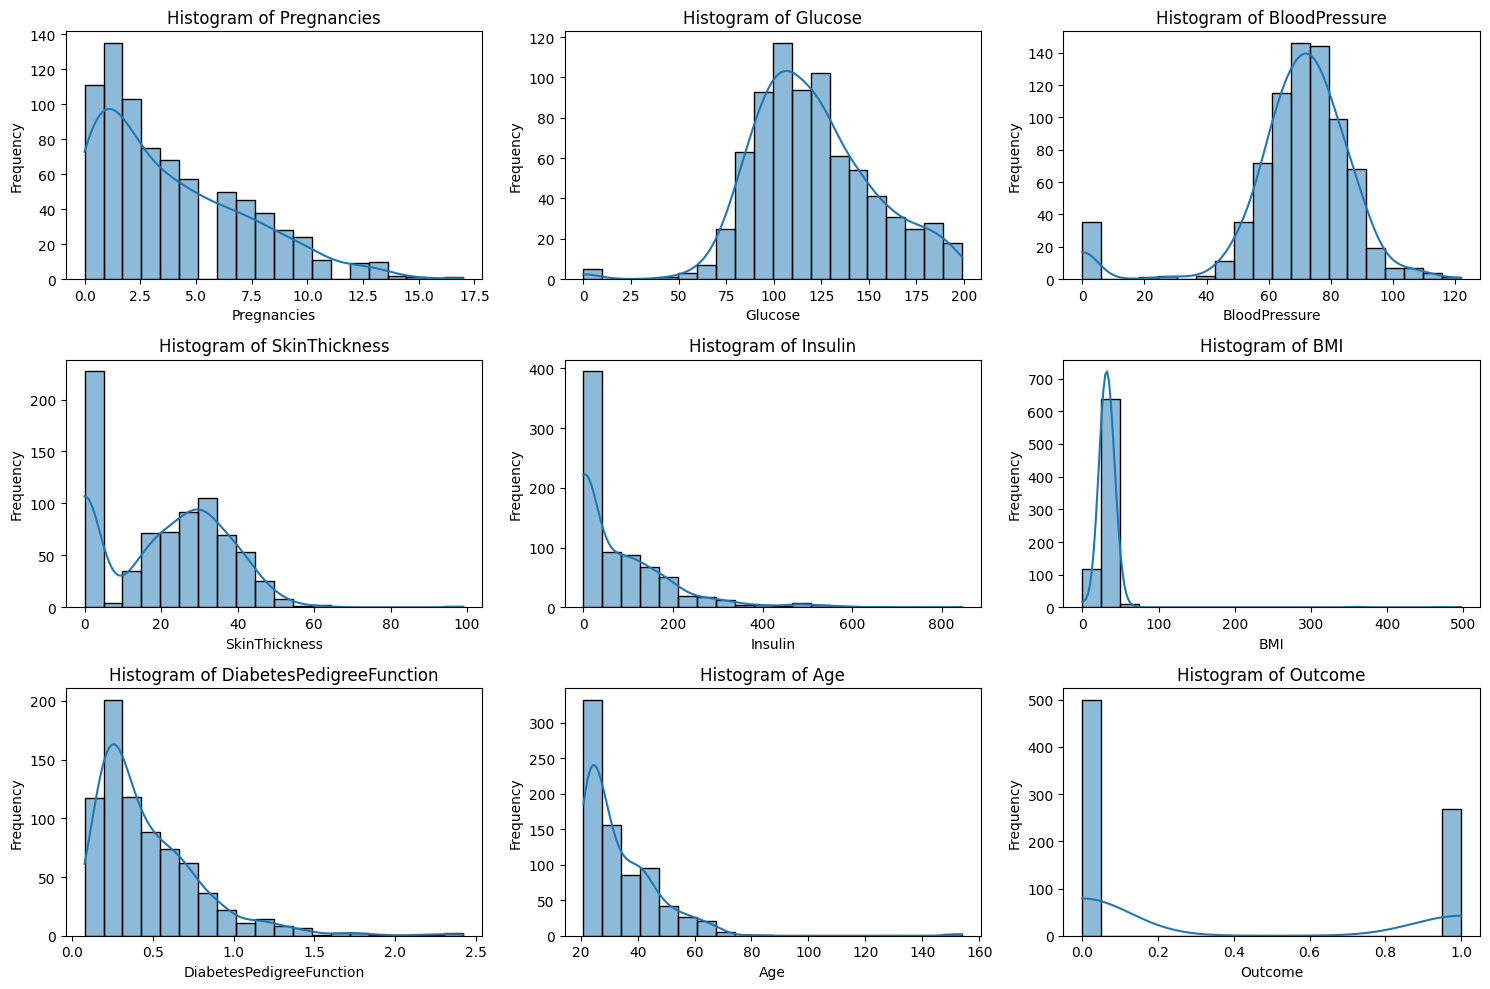

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menentukan jumlah kolom dan baris pada subplot
n_cols = 3
n_rows = (len(df.columns) - 1) // n_cols + 1

# Membuat subplot
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 10))

# Loop melalui setiap fitur dan plot histogramnya di subplot yang sesuai
for idx, feature in enumerate(df.columns):
    ax = axes[idx // n_cols, idx % n_cols]
    sns.histplot(df[feature], bins=20, kde=True, ax=ax)
    ax.set_title(f'Histogram of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')

# Menghilangkan subplot yang kosong (jika ada)
if len(df.columns) < n_cols * n_rows:
    for i in range(len(df.columns), n_cols * n_rows):
        fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

# **Checking distribution normal**

In [ ]:
## Checking Skewness in each features
df.skew()

Pregnancies                  0.901674
Glucose                      0.173754
BloodPressure               -1.843608
SkinThickness                0.109372
Insulin                      2.272251
BMI                         12.781784
DiabetesPedigreeFunction     1.919911
Age                          3.095060
Outcome                      0.635017
dtype: float64

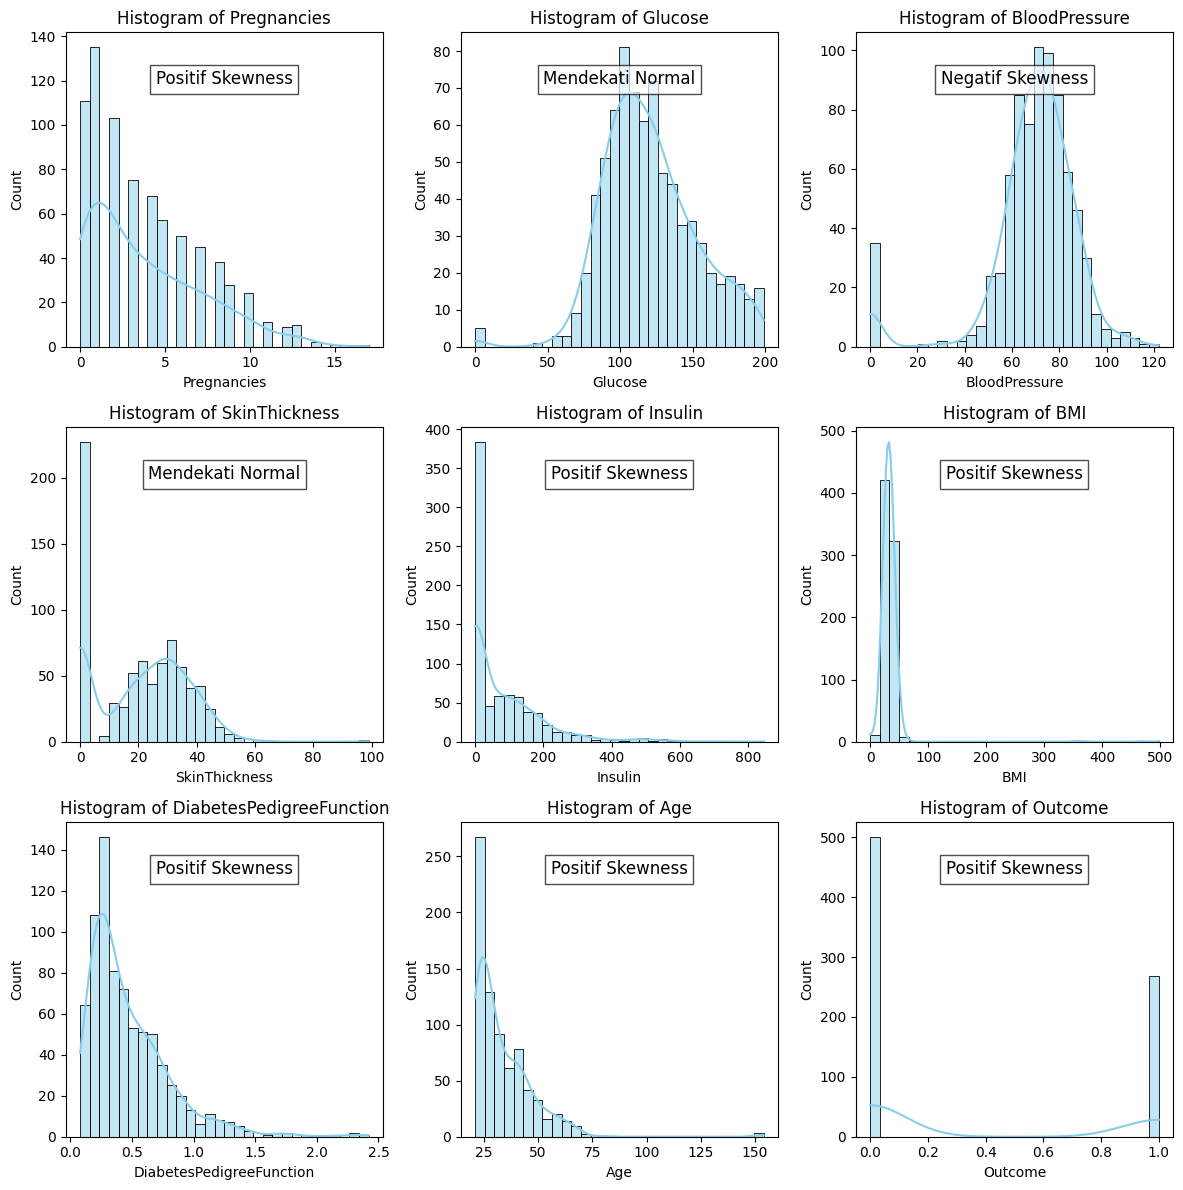

In [ ]:
plt.figure(figsize=(12, 12))
i = 1

for col in df.columns:
    plt.subplot(3, 3, i)
    sns.histplot(df[col], bins=30, color='skyblue', kde=True)

    skewness = df[col].skew()
    if skewness > 0.5:
        skewness_label = 'Positif Skewness'
    elif skewness < -0.5:
        skewness_label = 'Negatif Skewness'
    else:
        skewness_label = 'Mendekati Normal'

    plt.title(f'Histogram of {col}')

    # Menambahkan teks skewness_label pada setiap subplot
    plt.text(0.5, 0.85, skewness_label, horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.7))

    i += 1

plt.tight_layout()
plt.show()

Visualisasi skewnes

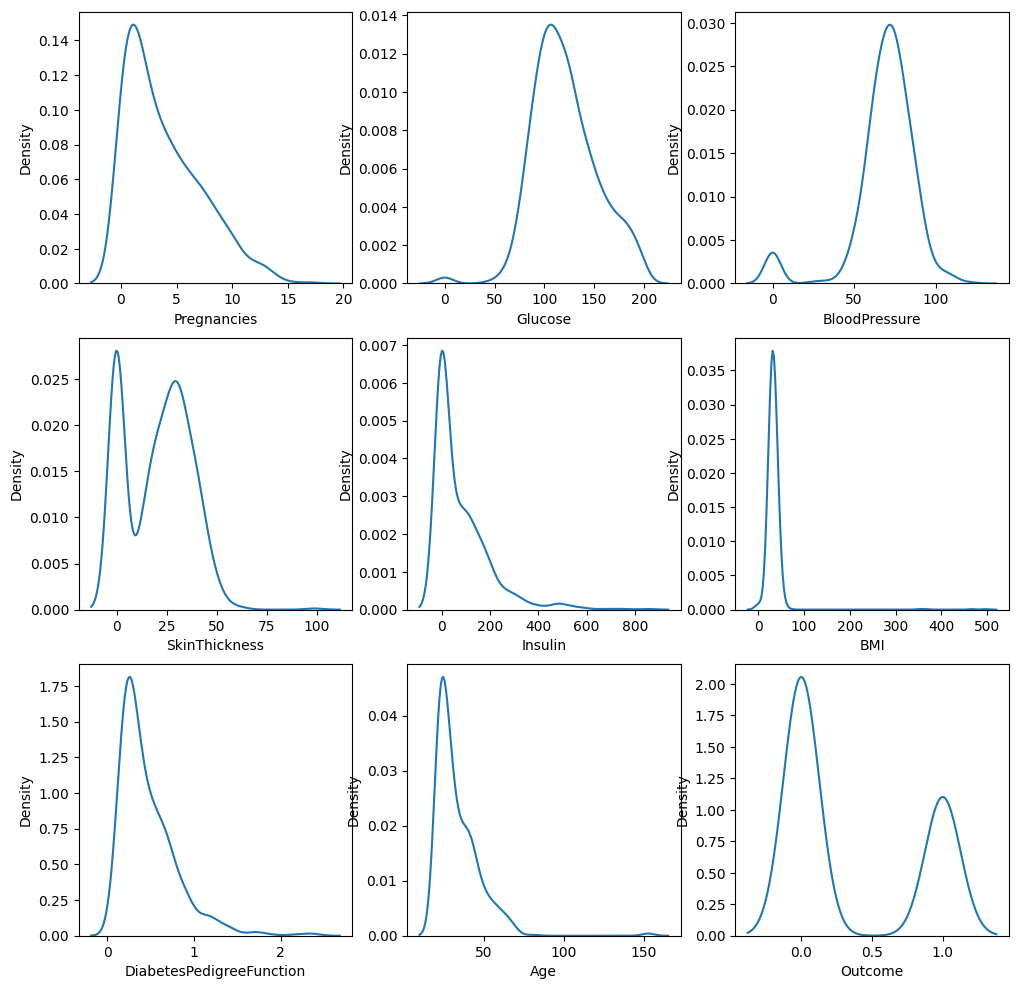

In [ ]:
plt.figure(figsize=(12,12))
i=1
for col in df.columns:
    plt.subplot(3,3,i)
    sns.kdeplot(df[col])
    i+=1

# **Outliers Detection**



Metode outliers detection
1. Metode Z-Score
2. Metode IQR
3. Metode Persentil

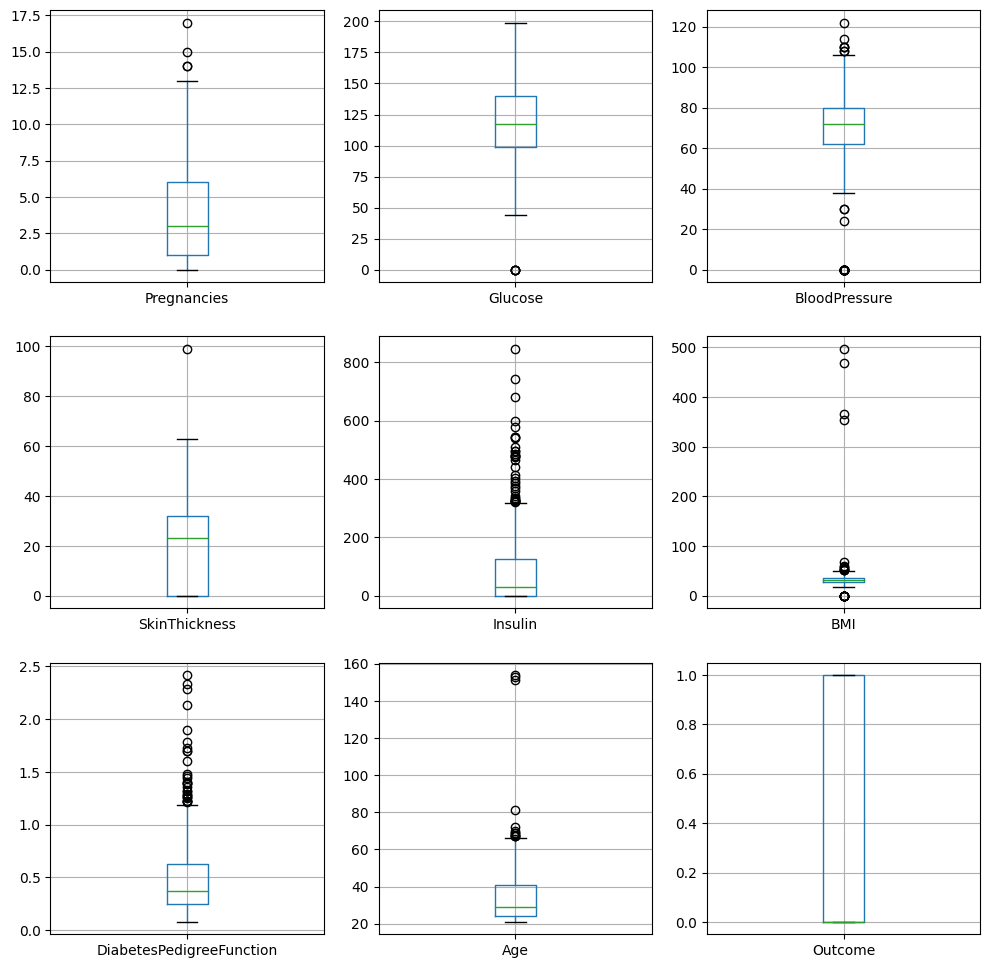

In [ ]:
plt.figure(figsize=(12,12))
i=1
for col in df.columns:
    plt.subplot(3,3,i)
    df[[col]].boxplot()
    i+=1

In [ ]:
## Checking Skewness in each features
df.skew()

Pregnancies                  0.901674
Glucose                      0.173754
BloodPressure               -1.843608
SkinThickness                0.109372
Insulin                      2.272251
BMI                         12.781784
DiabetesPedigreeFunction     1.919911
Age                          3.095060
Outcome                      0.635017
dtype: float64

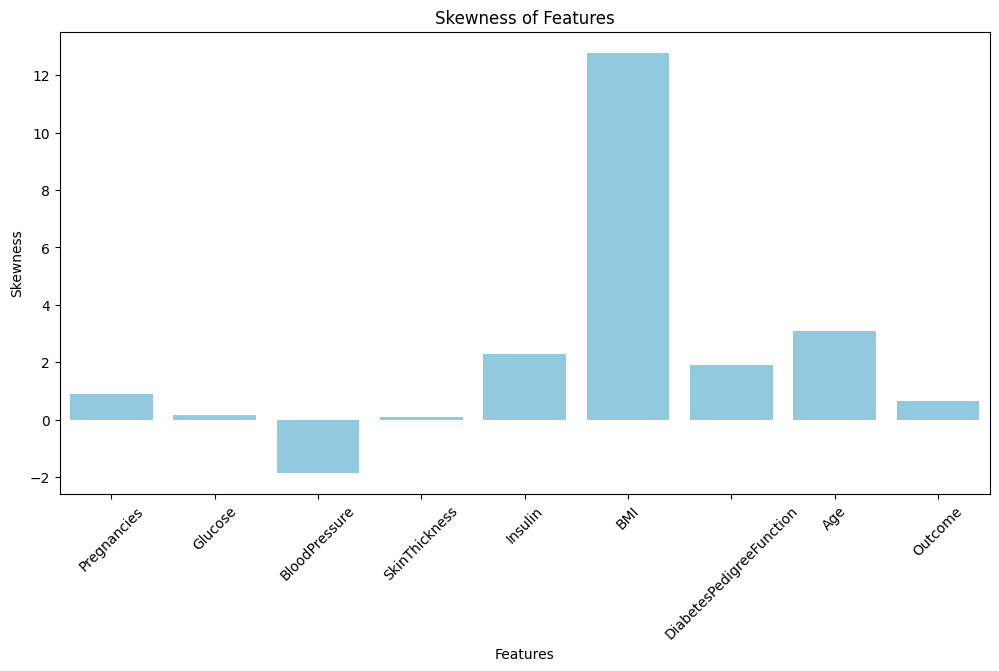

In [ ]:
# Mendapatkan skewness untuk setiap atribut
skewness = df.skew()

# Membuat visualisasi skewness
plt.figure(figsize=(12, 6))
sns.barplot(x=skewness.index, y=skewness, color='skyblue')
plt.title('Skewness of Features')
plt.xlabel('Features')
plt.ylabel('Skewness')
plt.xticks(rotation=45)
plt.show()


# **Outlier Handling (normalisasi)**

Z- Score = kondisi jika terdistribusi normal

IQR Method = kondisi jika skewed ( positive or negative)



In [ ]:
for col in df.iloc[:,:-1]:
    ## Z-Score Method
    if df[col].skew()<0.5 and df[col].skew()>-0.5:
        up_limit = df[col].mean() + 3 * df[col].std()
        lw_limit = df[col].mean() - 3 * df[col].std()

        df[col] = np.where(df[col]>up_limit, up_limit,
                          np.where(df[col]<lw_limit , lw_limit , df[col]))

    elif df[col].skew()>0.5 or df[col].skew()<-0.5:
        q3 = df[col].quantile(0.75)
        q1 = df[col].quantile(0.25)
        IQR = q3-q1
        up_limit = q3 + 1.5 * IQR
        lw_limit = q1 - 1.5 * IQR

        df[col] = np.where(df[col]>up_limit, up_limit,
                          np.where(df[col]<lw_limit , lw_limit , df[col]))

# **After Handling Outliers**

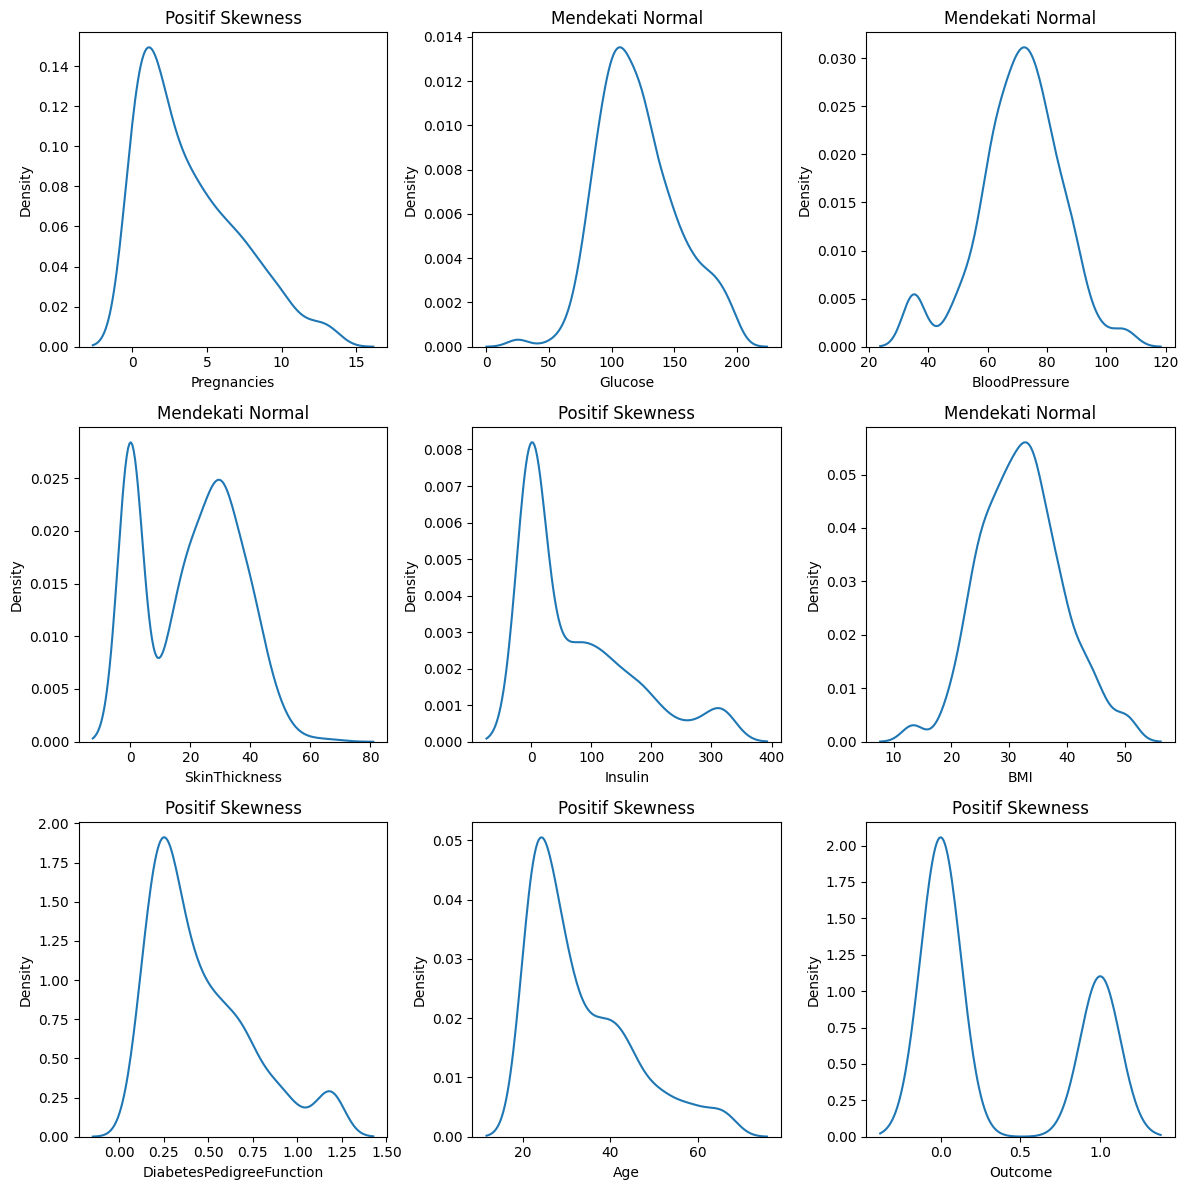

In [ ]:
plt.figure(figsize=(12, 12))
i = 1

for col in df.columns:
    plt.subplot(3, 3, i)
    sns.kdeplot(df[col])

    skewness = df[col].skew()
    if skewness > 0.5:
        skewness_label = 'Positif Skewness'
    elif skewness < -0.5:
        skewness_label = 'Negatif Skewness'
    else:
        skewness_label = 'Mendekati Normal'

    plt.title(f'{skewness_label}')

    i += 1

plt.tight_layout()
plt.show()

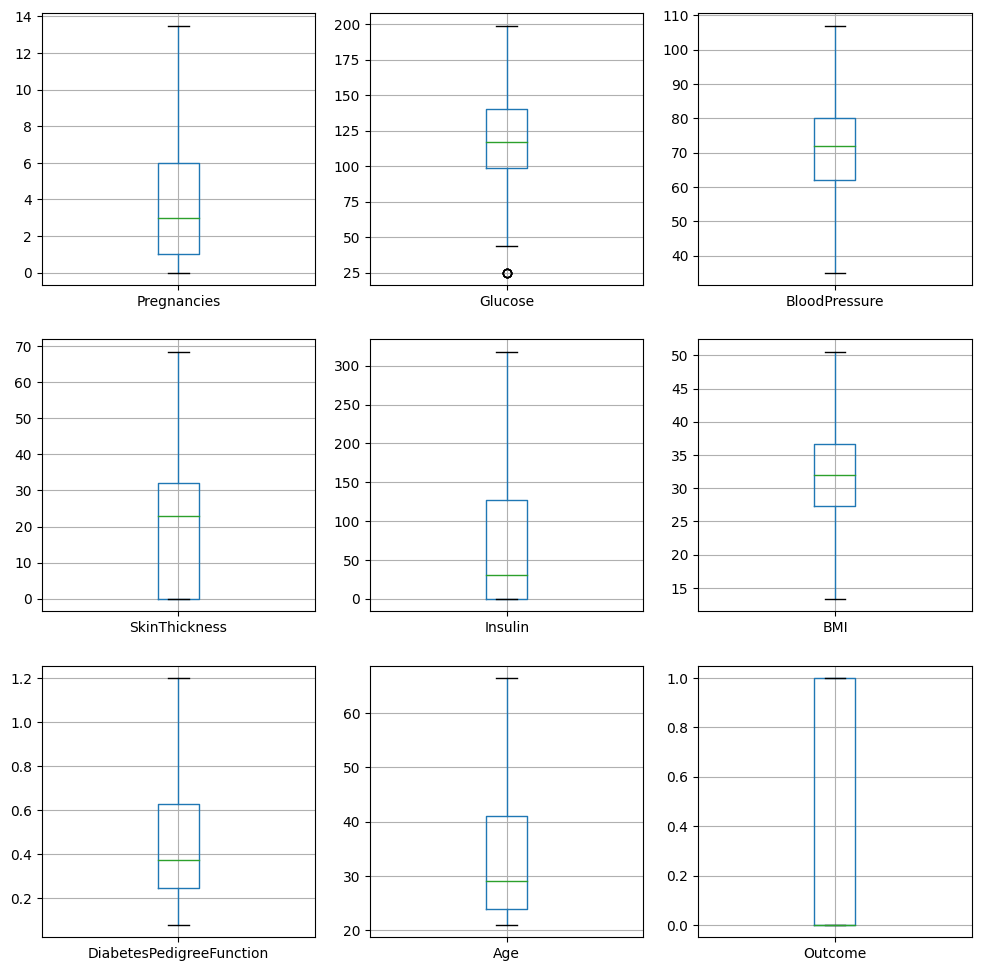

In [ ]:
## Mengecek setelah dilakuakan handling outliers
plt.figure(figsize=(12,12))
i=1
for col in df.columns:
    plt.subplot(3,3,i)
    df[[col]].boxplot()
    i+=1

## Split the data for training and testing data

melakukan pelabelan pada variable target yaitu Outcome, untuk apa? untuk menentukan apakah seseorang terkena diabetes (nilai 1) atau tidak (nilai 0 sekaligus melakukan pelabelan terhadap variable Outcome

In [ ]:
x = df.drop('Outcome',axis=1)

In [ ]:
y = df['Outcome']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


In [ ]:
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
512,9.0,91.0,68.0,0.0,0.0,24.2,0.200,58.0
346,1.0,139.0,46.0,19.0,83.0,28.7,0.654,22.0
41,7.0,133.0,84.0,0.0,0.0,40.2,0.696,37.0
723,5.0,117.0,86.0,30.0,105.0,39.1,0.251,42.0
362,5.0,103.0,107.0,37.0,0.0,39.2,0.305,65.0
...,...,...,...,...,...,...,...,...
343,5.0,122.0,86.0,0.0,0.0,34.7,0.290,33.0
61,8.0,133.0,72.0,0.0,0.0,32.9,0.270,39.0
508,2.0,84.0,50.0,23.0,76.0,30.4,0.968,21.0
20,3.0,126.0,88.0,41.0,235.0,39.3,0.704,27.0


In [ ]:
y_train

512    0
346    0
41     0
723    0
362    0
      ..
343    0
61     1
508    0
20     0
680    0
Name: Outcome, Length: 614, dtype: int64

In [ ]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

# **K-Nearest Neighbor (KNN)**
KNN adalah salah satu algoritma paling sederhana dalam machine learning. Model KNN beroperasi dengan cara mencari titik data terdekat dalam ruang fitur untuk membuat prediksi.

Membuat model

In [ ]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)
y_pred = knn_model.predict(x_test)
y_pred_train = knn_model.predict(x_train)

Evaluasi model

In [ ]:
print("-----Model Evaluation on Test Data-----")
print()
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
print()
print('Classification Report:\n',classification_report(y_test,y_pred))
print("------------------------------------------------------------------")
print()
print("-----Model Evaluation on Train Data-----")
print()
print('Confusion Matrix:\n',confusion_matrix(y_train,y_pred_train))
print()
print('Classification Report:\n',classification_report(y_train,y_pred_train))
print("------------------------------------------------------------------")
print()
print(f"Accuracy on Test Data:{accuracy_score(y_test,y_pred):.4f}")
print(f"Accuracy on Train Data:{accuracy_score(y_train,y_pred_train):.4f}")

-----Model Evaluation on Test Data-----

Confusion Matrix:
 [[89 21]
 [19 25]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.82       110
           1       0.54      0.57      0.56        44

    accuracy                           0.74       154
   macro avg       0.68      0.69      0.69       154
weighted avg       0.74      0.74      0.74       154

------------------------------------------------------------------

-----Model Evaluation on Train Data-----

Confusion Matrix:
 [[347  43]
 [ 76 148]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85       390
           1       0.77      0.66      0.71       224

    accuracy                           0.81       614
   macro avg       0.80      0.78      0.78       614
weighted avg       0.80      0.81      0.80       614

-----------------------------------------------------------------

# **Decision Tree**

Membuat model

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)
y_pred = dt_model.predict(x_test)
y_pred_train = dt_model.predict(x_train)

Evaluasi model

In [ ]:
print("-----Model Evaluation on Test Data-----")
print()
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
print()
print('Classification Report:\n',classification_report(y_test,y_pred))
print("------------------------------------------------------------------")
print()
print("-----Model Evaluation on Train Data-----")
print()
print('Confusion Matrix:\n',confusion_matrix(y_train,y_pred_train))
print()
print('Classification Report:\n',classification_report(y_train,y_pred_train))
print("------------------------------------------------------------------")
print()
print(f"Accuracy on Test Data: {accuracy_score(y_test,y_pred):.4f}")
print(f"Accuracy on Train Data: {accuracy_score(y_train,y_pred_train):.4f}")

-----Model Evaluation on Test Data-----

Confusion Matrix:
 [[83 27]
 [16 28]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.75      0.79       110
           1       0.51      0.64      0.57        44

    accuracy                           0.72       154
   macro avg       0.67      0.70      0.68       154
weighted avg       0.74      0.72      0.73       154

------------------------------------------------------------------

-----Model Evaluation on Train Data-----

Confusion Matrix:
 [[390   0]
 [  0 224]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       390
           1       1.00      1.00      1.00       224

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614

-----------------------------------------------------------------

Ternyata hasil accuracy belum memenuhi keberhasilan model seperti yang diinginkan yaitu lebih dari 70%, dilanjutkan untuk hyperparameter tunning

## Hyperparameter Tunning On Decision Tree
meningkatkan performa model yang lebih baik dan dapat meningkatkan akurasi dan kinerja model.

In [ ]:
dt_model_1=DecisionTreeClassifier()

param_grid={'criterion':['gini','entropy'],
            'max_depth':np.arange(2,25),
            'min_samples_split':np.arange(2,25),
            'min_samples_leaf':np.arange(2,25)}

rscv_dt_model_1=RandomizedSearchCV(dt_model_1,param_grid,cv=5)
rscv_dt_model_1.fit(x_train,y_train)
rscv_dt_model_1.best_estimator_

DecisionTreeClassifier(max_depth=20, min_samples_leaf=24, min_samples_split=3)

In [ ]:
new_dt_model = rscv_dt_model_1.best_estimator_

In [ ]:
y_pred = new_dt_model.predict(x_test)
print("-----Model Evaluation on Test Data-----")
print()
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
print()
print('Classification Report:\n',classification_report(y_test,y_pred))

print("------------------------------------------------------------------")
print()
y_pred_train = new_dt_model.predict(x_train)
print("-----Model Evaluation on Train Data-----")
print()
print('Confusion Matrix:\n',confusion_matrix(y_train,y_pred_train))
print()
print('Classification Report:\n',classification_report(y_train,y_pred_train))
print("------------------------------------------------------------------")
print()
print(f"Accuracy on Test Data: {accuracy_score(y_test,y_pred):.4f}")
print(f"Accuracy on Train Data: {accuracy_score(y_train,y_pred_train):.4f}")

-----Model Evaluation on Test Data-----

Confusion Matrix:
 [[97 13]
 [19 25]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       110
           1       0.66      0.57      0.61        44

    accuracy                           0.79       154
   macro avg       0.75      0.73      0.73       154
weighted avg       0.79      0.79      0.79       154

------------------------------------------------------------------

-----Model Evaluation on Train Data-----

Confusion Matrix:
 [[342  48]
 [ 70 154]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       390
           1       0.76      0.69      0.72       224

    accuracy                           0.81       614
   macro avg       0.80      0.78      0.79       614
weighted avg       0.81      0.81      0.81       614

-----------------------------------------------------------------

# **Feature importance dari Decision Tree**
Feature Importance adalah suatu pengukuran untuk menjelaskan pengaruh
dari setiap variabel terhadap model yang dibangun dalam Machine Learning

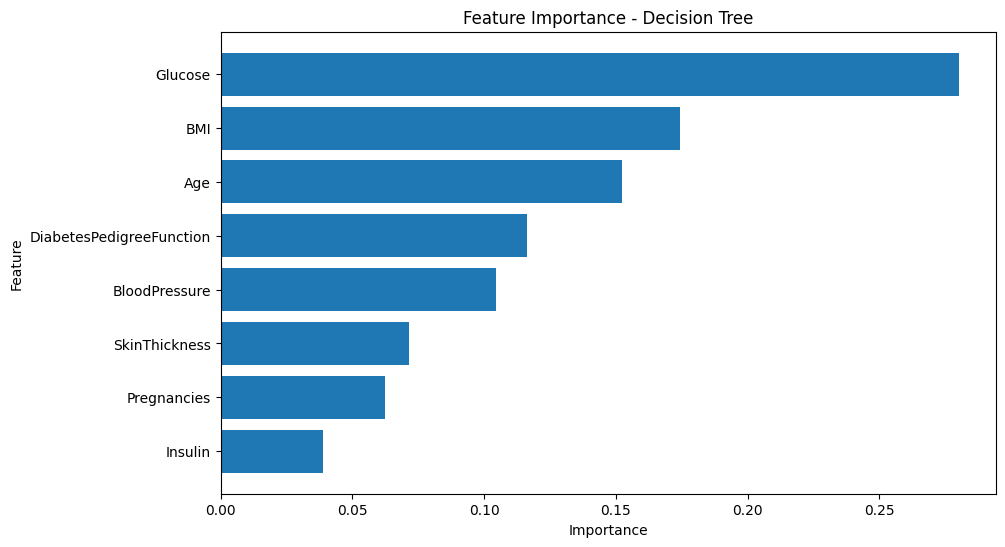

In [ ]:
# Mengambil feature importance
feature_importance = dt_model.feature_importances_

# Mendapatkan nama fitur
feature_names = x_train.columns

# Membuat dataframe untuk "feature importance"
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Mengurutkan berdasarkan tingkat penting
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Membuat grafik batang untuk "feature importance"
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance - Decision Tree')
plt.show()

# **Random Forest Tree**

Membuat model

In [ ]:
rt_model = RandomForestClassifier()
rt_model.fit(x_train, y_train)
y_pred = rt_model.predict(x_test)
y_pred_train = rt_model.predict(x_train)

Evaluasi model

In [ ]:
print("-----Model Evaluation on Test Data-----")
print()
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
print()
print('Classification Report:\n',classification_report(y_test,y_pred))
print("------------------------------------------------------------------")
print()
print("-----Model Evaluation on Train Data-----")
print()
print('Confusion Matrix:\n',confusion_matrix(y_train,y_pred_train))
print()
print('Classification Report:\n',classification_report(y_train,y_pred_train))
print("------------------------------------------------------------------")
print()
print(f"Accuracy on Test Data: {accuracy_score(y_test,y_pred):.4f}")
print(f"Accuracy on Train Data: {accuracy_score(y_train,y_pred_train):.4f}")

-----Model Evaluation on Test Data-----

Confusion Matrix:
 [[96 14]
 [18 26]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.86       110
           1       0.65      0.59      0.62        44

    accuracy                           0.79       154
   macro avg       0.75      0.73      0.74       154
weighted avg       0.79      0.79      0.79       154

------------------------------------------------------------------

-----Model Evaluation on Train Data-----

Confusion Matrix:
 [[390   0]
 [  0 224]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       390
           1       1.00      1.00      1.00       224

    accuracy                           1.00       614
   macro avg       1.00      1.00      1.00       614
weighted avg       1.00      1.00      1.00       614

-----------------------------------------------------------------

## Hyperparameter Tunning On Random Forest Tree
meningkatkan performa model yang lebih baik dan dapat meningkatkan akurasi dan kinerja model.

In [ ]:
rt_model_1 = RandomForestClassifier()
param_grid={'n_estimators':np.arange(50,200),
            'criterion':['gini','entropy'],
            'max_depth':np.arange(2,25),
            'min_samples_split':np.arange(2,25),
            'min_samples_leaf':np.arange(2,25),
            'oob_score':[True]}

rscv_rt_model=RandomizedSearchCV(rt_model_1,param_grid,cv=5)
rscv_rt_model.fit(x_train,y_train)
rscv_rt_model.best_estimator_

RandomForestClassifier(max_depth=16, min_samples_leaf=17, min_samples_split=17,
                       n_estimators=199, oob_score=True)

In [ ]:
new_rt_model = rscv_rt_model.best_estimator_

In [ ]:
y_pred = new_rt_model.predict(x_test)
print("-----Model Evaluation on Test Data-----")
print()
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
print()
print('Classification Report:\n',classification_report(y_test,y_pred))

print("------------------------------------------------------------------")
print()
y_pred_train = new_rt_model.predict(x_train)
print("-----Model Evaluation on Train Data-----")
print()
print('Confusion Matrix:\n',confusion_matrix(y_train,y_pred_train))
print()
print('Classification Report:\n',classification_report(y_train,y_pred_train))
print("------------------------------------------------------------------")
print()
print(f"Accuracy on Test Data: {accuracy_score(y_test,y_pred):.4f}")
print(f"Accuracy on Train Data: {accuracy_score(y_train,y_pred_train):.4f}")

-----Model Evaluation on Test Data-----

Confusion Matrix:
 [[99 11]
 [18 26]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87       110
           1       0.70      0.59      0.64        44

    accuracy                           0.81       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.81      0.81      0.81       154

------------------------------------------------------------------

-----Model Evaluation on Train Data-----

Confusion Matrix:
 [[353  37]
 [ 82 142]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.91      0.86       390
           1       0.79      0.63      0.70       224

    accuracy                           0.81       614
   macro avg       0.80      0.77      0.78       614
weighted avg       0.80      0.81      0.80       614

-----------------------------------------------------------------

# **Feature importance dari Random Forest Tree**
Feature Importance adalah suatu pengukuran untuk menjelaskan pengaruh
dari setiap variabel terhadap model yang dibangun dalam Machine Learning

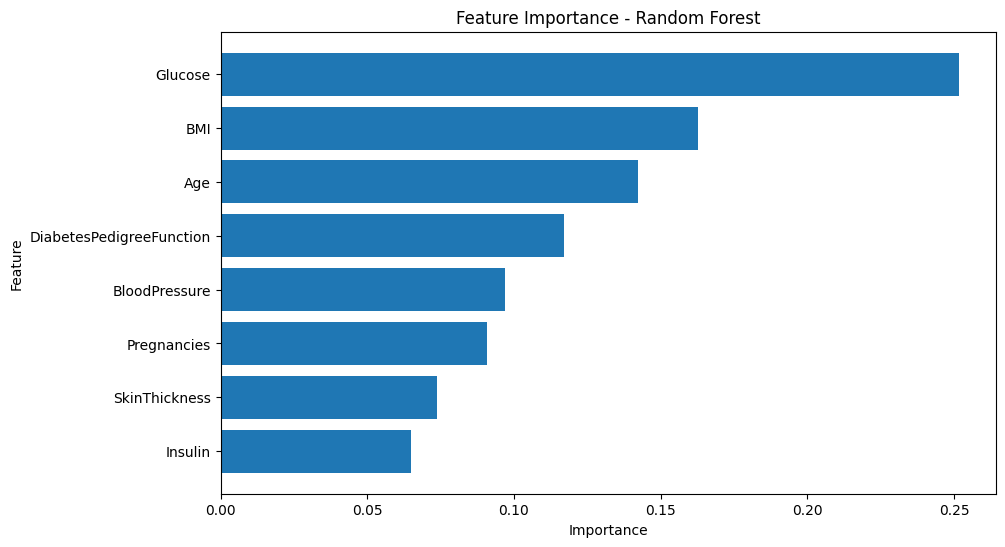

In [ ]:
# Mengambil feature importance
feature_importance = rt_model.feature_importances_

# Mendapatkan nama fitur
feature_names = x_train.columns

# Membuat dataframe untuk "feature importance"
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Mengurutkan berdasarkan tingkat penting
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Membuat grafik batang untuk "feature importance"
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance - Random Forest')
plt.show()

Visualisasi

## **Adaboost**

Membuat model

In [ ]:
ab_model = AdaBoostClassifier()
ab_model.fit(x_train, y_train)
y_pred = ab_model.predict(x_test)
y_pred_train = ab_model.predict(x_train)

Evaluasi model

In [ ]:
print("-----Model Evaluation on Test Data-----")
print()
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
print()
print('Classification Report:\n',classification_report(y_test,y_pred))
print("------------------------------------------------------------------")
print()
print("-----Model Evaluation on Train Data-----")
print()
print('Confusion Matrix:\n',confusion_matrix(y_train,y_pred_train))
print()
print('Classification Report:\n',classification_report(y_train,y_pred_train))
print("------------------------------------------------------------------")
print()
print(f"Accuracy on Test Data: {accuracy_score(y_test,y_pred):.4f}")
print(f"Accuracy on Train Data: {accuracy_score(y_train,y_pred_train):.4f}")

-----Model Evaluation on Test Data-----

Confusion Matrix:
 [[91 19]
 [19 25]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83       110
           1       0.57      0.57      0.57        44

    accuracy                           0.75       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.75      0.75      0.75       154

------------------------------------------------------------------

-----Model Evaluation on Train Data-----

Confusion Matrix:
 [[350  40]
 [ 71 153]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86       390
           1       0.79      0.68      0.73       224

    accuracy                           0.82       614
   macro avg       0.81      0.79      0.80       614
weighted avg       0.82      0.82      0.82       614

-----------------------------------------------------------------

## Hyperparameter Tunning on Adaboost  
meningkatkan performa model yang lebih baik dan dapat meningkatkan akurasi dan kinerja model.

In [ ]:
ab_model_1=AdaBoostClassifier()

param_grid={'n_estimators':np.arange(50,200),
    'learning_rate':np.arange(0,2,0.001)}

rscv_ab_model=RandomizedSearchCV(ab_model_1,param_grid,cv=5)
rscv_ab_model.fit(x_train,y_train)
rscv_ab_model.best_estimator_

AdaBoostClassifier(learning_rate=0.162, n_estimators=118)

In [ ]:
new_ab_model = rscv_ab_model.best_estimator_

In [ ]:
y_pred = new_ab_model.predict(x_test)
print("-----Model Evaluation on Test Data-----")
print()
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
print()
print('Classification Report:\n',classification_report(y_test,y_pred))
print("------------------------------------------------------------------")
print()
y_pred_train = new_ab_model.predict(x_train)
print("-----Model Evaluation on Train Data-----")
print()
print('Confusion Matrix:\n',confusion_matrix(y_train,y_pred_train))
print()
print('Classification Report:\n',classification_report(y_train,y_pred_train))
print("------------------------------------------------------------------")
print()
print(f"Accuracy on Test Data: {accuracy_score(y_test,y_pred):.4f}")
print(f"Accuracy on Train Data: {accuracy_score(y_train,y_pred_train):.4f}")

-----Model Evaluation on Test Data-----

Confusion Matrix:
 [[96 14]
 [17 27]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86       110
           1       0.66      0.61      0.64        44

    accuracy                           0.80       154
   macro avg       0.75      0.74      0.75       154
weighted avg       0.79      0.80      0.80       154

------------------------------------------------------------------

-----Model Evaluation on Train Data-----

Confusion Matrix:
 [[351  39]
 [ 81 143]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.90      0.85       390
           1       0.79      0.64      0.70       224

    accuracy                           0.80       614
   macro avg       0.80      0.77      0.78       614
weighted avg       0.80      0.80      0.80       614

-----------------------------------------------------------------

## Predictions

In [ ]:
#Random Forest Tree
y_pred = new_rt_model.predict(x_test)
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.8116883116883117


In [ ]:
y_pred[:10]   # Predicted Class Labels

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [ ]:
y_test[:10]  # actual Class Labels

158    0
89     0
760    0
354    0
438    0
390    0
682    0
546    1
303    1
413    0
Name: Outcome, dtype: int64

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## Mecoba kameampuan model dengan user inputs

In [ ]:
input_data = [6,148,35,72,0,33.6,0.627,50]
predictions = new_ab_model.predict([input_data])[0]
if predictions ==1:
    print("Diprediksi terkena Diabetes.")
else:
    print("Diprediksi tidak terkena Diabetes.")

Diprediksi terkena Diabetes.


In [ ]:
input_data = [1, 89, 66, 23, 94, 28.1, 0.167, 21]
predictions = new_ab_model.predict([input_data])[0]
if predictions ==1:
    print("Diprediksi terkena Diabetes")
else:
    print("Diprediksi tidak terkena Diabetes")

Diprediksi tidak terkena Diabetes


# **Kesimpulan**

Saya telah melakukan pembandingan kinerja beberapa algoritma machine learning untuk memprediksi kasus diabetes. Algoritma-algoritma yang saya uji diantaranya:
1. K-Nearest Neighbors (KNN)
2. Decision Tree Classifier
3. Random Forest Classifier
4. Adaboost Classifier

Hasil pembandingan menunjukkan bahwa dari semua model yang diuji, Random Forest Tree Classifier adalah yang memiliki kinerja terbaik. Algoritma Random Forest Tree Classifier memberikan hasil prediksi yang lebih akurat untuk kasus diabetes dibandingkan dengan algoritma-algoritma lainnya.

Oleh karena itu, saya telah memilih Random Forest Tree Classifier sebagai model prediksi untuk memprediksi apakah seseorang terkena diabetes atau tidak berdasarkan data yang diberikan.